In [1]:
import numpy as np
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
tr = pd.read_csv('../../data/raw/UNSW_NB15_training-set.csv')
tt = pd.read_csv('../../data/raw/UNSW_NB15_testing-set.csv')
tr.shape, tt.shape

((82332, 45), (175341, 45))

In [3]:
data = pd.concat([tr, tt])
data.shape

(257673, 45)

## Missing values

In [4]:
data.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<AxesSubplot:>

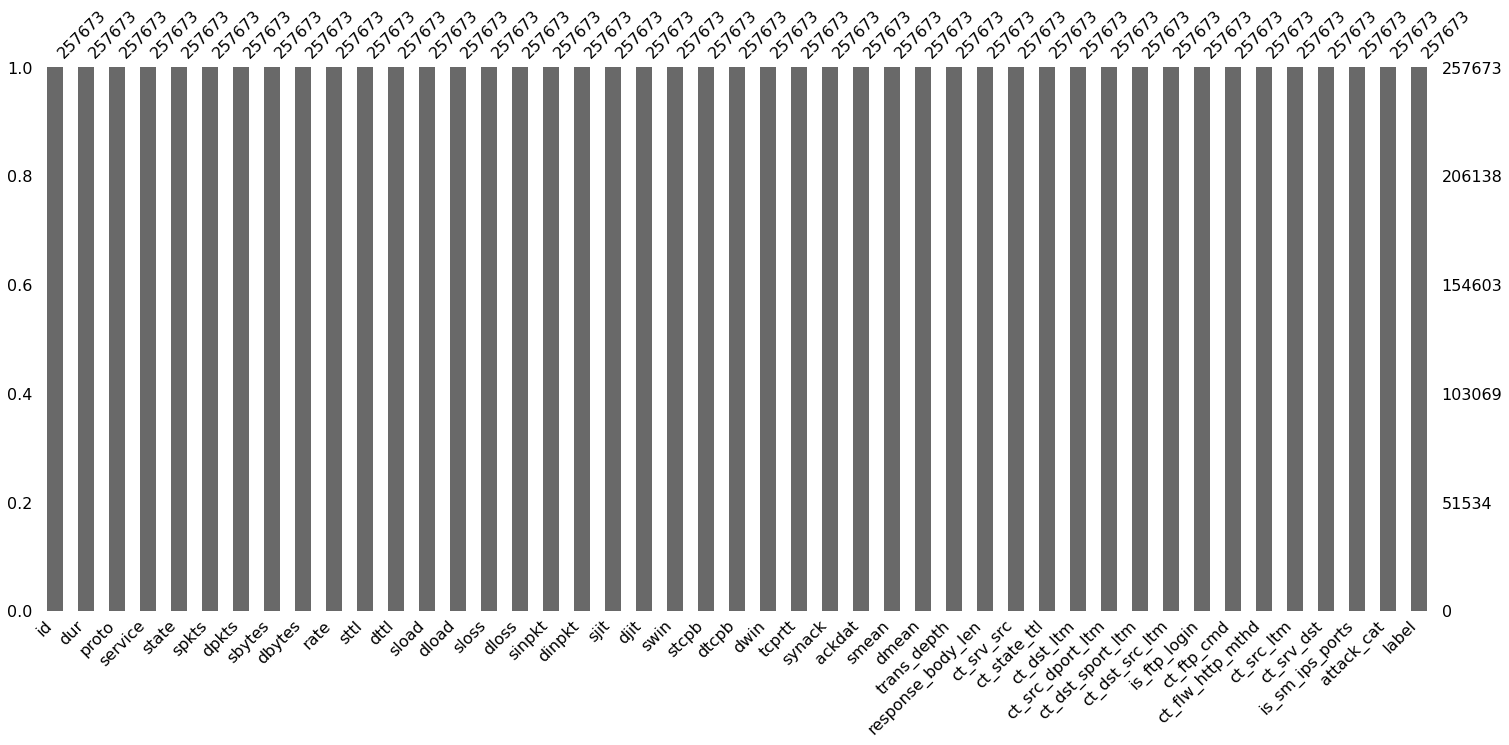

In [5]:
msno.bar(data)

## Label

### Label

In [6]:
pd.DataFrame(
    {
        'counts': data['label'].value_counts(),
        'percentage': data['label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    }
).sort_index().set_axis(['normal', 'anomaly'], axis='index')

,counts,percentage
normal,93000,36.1%
anomaly,164673,63.9%


<AxesSubplot:ylabel='label'>

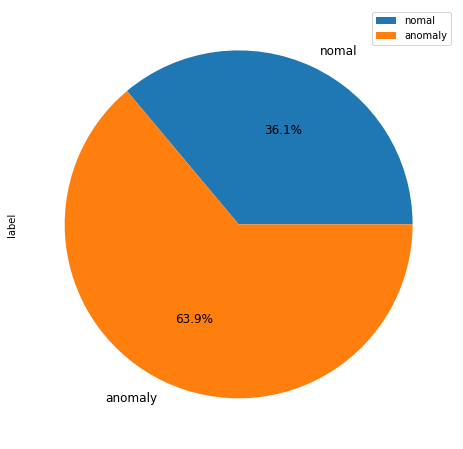

In [7]:
data['label'].value_counts()\
    .sort_index()\
    .set_axis(['nomal', 'anomaly'], axis='index')\
    .plot.pie(startangle=0, autopct='%1.1f%%', legend=True, fontsize=12, figsize=(8, 8))

In [8]:
pd.DataFrame(
    {
        'count': data['attack_cat'].value_counts(),
        'percentage': data['attack_cat'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    }
)

,count,percentage
Normal,93000,36.1%
Generic,58871,22.8%
Exploits,44525,17.3%
Fuzzers,24246,9.4%
DoS,16353,6.3%
Reconnaissance,13987,5.4%
Analysis,2677,1.0%
Backdoor,2329,0.9%
Shellcode,1511,0.6%
Worms,174,0.1%


### Attack category

<AxesSubplot:ylabel='attack_cat'>

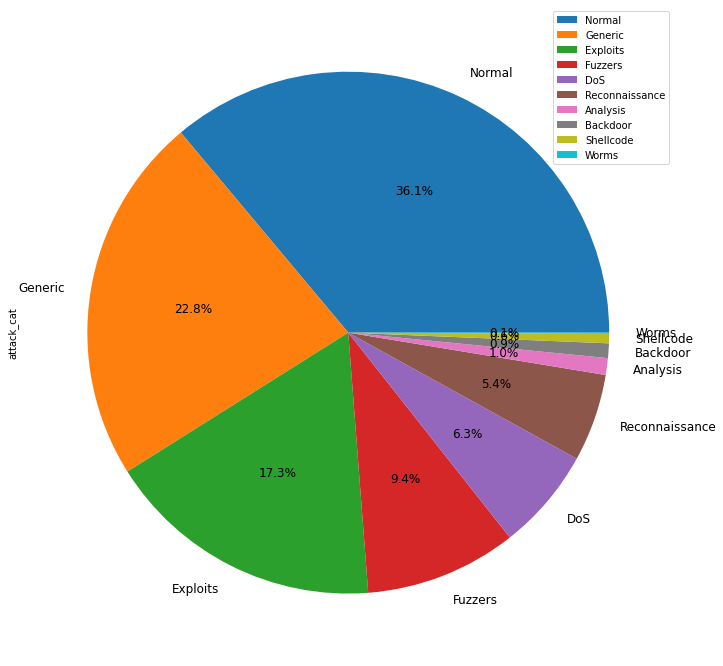

In [9]:
data['attack_cat'].value_counts().plot.pie(autopct='%1.1f%%', legend=True, fontsize=12, figsize=(12, 12))

## Data process

### Get category and numeric column names

In [10]:
cols = data.columns
cols_cat = data.select_dtypes('object').columns
cols_numeric = data._get_numeric_data().columns

print(cols)
print(cols_cat)
print(cols_numeric)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')
Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')
Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_

### Remove category columns dump value

In [11]:
# remove dump value
def remove_dump_values(data, cols):
    for col in cols:
        data[col] = np.where(data[col] == '-', 'None', data[col])
    return data

In [12]:
data_bin = remove_dump_values(data, cols_cat)

### Remove unnecessary features

In [13]:
# remove unnecessary features
cols_cat = cols_cat.drop(['attack_cat'])
cols_numeric = cols_numeric.drop(['id', 'label'])

print(cols_cat)
print(cols_numeric)

Index(['proto', 'service', 'state'], dtype='object')
Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')


### One hot encoding category feature

In [14]:
# one hot encoding category feature
data_bin_hot = pd.get_dummies(data_bin, columns=cols_cat)
data_bin_hot.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,0,0,0,0,1,0,0,0,0,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,0,0,0,0,1,0,0,0,0,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,0,0,0,0,1,0,0,0,0,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,0,0,0,0,1,0,0,0,0,0


### Normalize numeric features

In [15]:
# normalize numeric features
data_bin_hot[cols_numeric] = data_bin_hot[cols_numeric].astype('float')
data_bin_hot[cols_numeric] = (data_bin_hot[cols_numeric] - np.min(data_bin_hot[cols_numeric])) / np.std(data_bin_hot[cols_numeric])
data_bin_hot.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1,1.841222e-06,0.007356,0.0,0.002716,0.0,0.566962,2.478337,0.0,0.971102,...,0,0,0,0,1,0,0,0,0,0
1,2,1.339070e-06,0.007356,0.0,0.010002,0.0,0.779572,2.478337,0.0,4.743422,...,0,0,0,0,1,0,0,0,0,0
2,3,8.369190e-07,0.007356,0.0,0.006008,0.0,1.247316,2.478337,0.0,4.600204,...,0,0,0,0,1,0,0,0,0,0
3,4,1.004303e-06,0.007356,0.0,0.005041,0.0,1.039430,2.478337,0.0,3.230480,...,0,0,0,0,1,0,0,0,0,0
4,5,1.673838e-06,0.007356,0.0,0.012096,0.0,0.623658,2.478337,0.0,4.578667,...,0,0,0,0,1,0,0,0,0,0
